## **Project Overview: RFM Customer Segmentation Analysis**

In today’s competitive market, understanding customer behavior is key to business growth. This project leverages RFM (Recency, Frequency, Monetary) analysis to segment customers based on their purchasing patterns. RFM is a proven marketing technique that helps businesses identify and categorize customers by analyzing how recently they purchased (Recency), how often they purchase (Frequency), and how much they spend (Monetary).

- By applying RFM analysis, we aim to:

- Classify customers into meaningful segments

- Identify high-value customers and churn risks

- Personalize marketing efforts for better ROI

- Enhance customer lifetime value through data-driven strategies

This project walks through the complete pipeline of loading customer data, performing RFM scoring, creating segments, and deriving actionable business insights using Python.


### **What is RFM Analysis?**  
RFM stands for:

Recency (R): How recently a customer made a purchase.
   - The more recent, the better.

Frequency (F): How often a customer makes a purchase.
    - Loyal customers purchase more often.

Monetary (M): How much money a customer spends.
   - High spenders are valuable customers.

Each of these metrics is calculated per customer and then scored (typically on a scale of 1 to 5). The combination of these scores forms an RFM score that is used to segment customers into different behavioral groups (e.g., Loyal, At Risk, Big Spenders, Lost, New Customers).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel(r'C:\Users\anxaa\OneDrive\Documents\Altamash\Imarticus PDFs\Classworks by me\ML Advanced\Dataset\Sample - Superstore.xls')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,10190,US-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
10190,10191,US-2022-115427,2022-12-30,2023-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
10191,10192,US-2022-156720,2022-12-30,2023-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
10192,10193,US-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [ ]:
# ! pip install xlrd

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

### **Min and Max Order Date**

In [ ]:
df["Order Date"].min(), df["Order Date"].max()

(Timestamp('2019-01-03 00:00:00'), Timestamp('2022-12-30 00:00:00'))

### Recency of each cutomer :

In [ ]:
df_recency = df.groupby(by='Customer Name',
                        as_index=False)['Order Date'].max()   ##--> as index to mention the index of the column rather than the name of the column

df_recency.columns = ['Customers','LastPurchaseDate']

recent_date = df_recency['LastPurchaseDate'].max()

df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

df_recency.head()

,Customers,LastPurchaseDate,Recency
0,Aaron Bergman,2021-11-10,415
1,Aaron Hawkins,2022-12-18,12
2,Aaron Smayling,2022-10-03,88
3,Adam Bellavance,2022-11-06,54
4,Adam Hart,2022-11-26,34


### Frequency of each Customer:

In [ ]:
frequency_df = df.drop_duplicates().groupby(
    by='Customer Name',
    as_index=False)['Order Date'].count()

frequency_df.columns = ['Customers','Frequency']

frequency_df.head()


,Customers,Frequency
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20


### Monetary value for each customer:

In [18]:
df["Total"] = df["Sales"] * df["Quantity"]
monetary_df  = df.drop_duplicates().groupby(
    by='Customer Name',
    as_index=False)["Total"].sum()

monetary_df.columns = ['Customers','Monetary']

monetary_df.head()


,Customers,Monetary
0,Aaron Bergman,1984.480
1,Aaron Hawkins,11459.552
2,Aaron Smayling,9088.880
3,Adam Bellavance,35390.580
4,Adam Hart,9664.265


### Creating an RFM Dataframe :

In [21]:
rf_df = df_recency.merge(frequency_df, on='Customers')
rfm_df = rf_df.merge(monetary_df, on='Customers').drop(columns = 'LastPurchaseDate')
rfm_df.head()

,Customers,Recency,Frequency,Monetary
0,Aaron Bergman,415,6,1984.480
1,Aaron Hawkins,12,11,11459.552
2,Aaron Smayling,88,10,9088.880
3,Adam Bellavance,54,18,35390.580
4,Adam Hart,34,20,9664.265


In [22]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending = False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending = True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending = True)

# Normalizing the rank of the Customer --> scaling the data in to range of 0 to 1 -- we do not Standardize since we need the outlier --- we normalize so that model we created does not give any value more importance 
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns = ['R_rank', 'F_rank', 'M_rank'], inplace = True)

rfm_df['R_rank_norm'].max()
rfm_df.head()

,Customers,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,8.959900,12.9375,10.875
1,Aaron Hawkins,12,11,11459.552,90.162907,45.3125,55.875
2,Aaron Smayling,88,10,9088.880,45.676692,38.1250,46.125
3,Adam Bellavance,54,18,35390.580,58.959900,80.7500,92.000
4,Adam Hart,34,20,9664.265,72.305764,86.7500,48.750


### RFM Score :

In [24]:
rfm_df['RFM_Score'] =  0.15*rfm_df['R_rank_norm'] + 0.28*rfm_df['F_rank_norm'] + 0.57*rfm_df['M_rank_norm']

rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[(rfm_df['RFM_Score'] ==rfm_df['RFM_Score'].min()) | (rfm_df['RFM_Score'] ==rfm_df['RFM_Score'].max())]

,Customers,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
460,Lela Donovan,552,1,15.91,4.89,0.38,0.25,0.05
595,Patrick O'Brill,4,22,69297.41,97.06,91.25,98.88,4.82
632,Ricardo Emerson,1097,1,241.80,0.38,0.38,1.50,0.05


### **Rating Customer based upon the RGM Score**

- rfm score > 4.5 : Top customer
- 4.5 > rfm score > 4 : High value customer
- 4> rfm score > 3 : Medium value customer
- 3> rfm score > 1.5 : Low value customer
- rfm score < 1.5 : Lost customer

In [25]:
def segment (value): 
    if value > 4.5 : 
        return "Top Customers"
    elif value > 4 :
        return "High Value Customers"
    elif value > 3 :
        return "Medium Value Customers"
    elif value > 1.5 :
        return "Low Value Customers"
    else :
        return "Lost Customers"


In [26]:
rfm_df["Customer_segment"] = rfm_df["RFM_Score"].apply(segment)
rfm_df

,Customers,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,Aaron Bergman,415,6,1984.48,8.96,12.94,10.88,0.56,Lost Customers
1,Aaron Hawkins,12,11,11459.55,90.16,45.31,55.88,2.90,Low Value Customers
2,Aaron Smayling,88,10,9088.88,45.68,38.12,46.12,2.19,Low Value Customers
3,Adam Bellavance,54,18,35390.58,58.96,80.75,92.00,4.19,High Value Customers
4,Adam Hart,34,20,9664.26,72.31,86.75,48.75,3.15,Medium Value Customers
...,...,...,...,...,...,...,...,...,...
795,Xylona Preis,43,34,9183.58,64.79,99.38,46.75,3.21,Medium Value Customers
796,Yana Sorensen,9,12,46478.99,91.79,51.44,95.38,4.13,High Value Customers
797,Yoseph Carroll,4,8,27208.93,97.06,24.75,86.00,3.53,Medium Value Customers
798,Zuschuss Carroll,54,31,40212.89,58.96,98.38,93.88,4.49,High Value Customers


In [28]:
rfm_df[["Customers", "RFM_Score", "Customer_segment"]].head(20)

,Customers,RFM_Score,Customer_segment
0,Aaron Bergman,0.56,Lost Customers
1,Aaron Hawkins,2.90,Low Value Customers
2,Aaron Smayling,2.19,Low Value Customers
3,Adam Bellavance,4.19,High Value Customers
4,Adam Hart,3.15,Medium Value Customers
5,Adam Shillingsburg,3.80,Medium Value Customers
6,Adrian Barton,4.56,Top Customers
7,Adrian Hane,2.63,Low Value Customers
8,Adrian Shami,0.60,Lost Customers
9,Aimee Bixby,1.69,Low Value Customers


In [32]:
rfm_df["Customer_segment"].value_counts()

Customer_segment
Low Value Customers       286
Medium Value Customers    233
Lost Customers            197
High Value Customers       67
Top Customers              17
Name: count, dtype: int64

Text(0, 0.5, '')

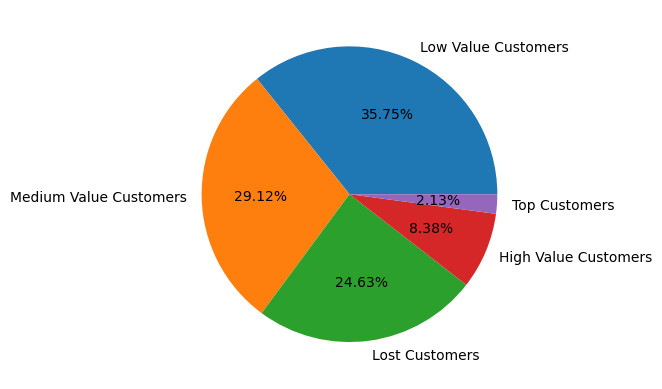

In [35]:
rfm_df["Customer_segment"].value_counts().plot(kind = "pie", autopct = "%1.2f%%")
plt.ylabel("")


##  Key Insights from RFM Analysis

1. **High-Value Customers**:
   - Customers with high recency (recent purchases), high frequency (repeat buyers), and high monetary values are your most loyal and profitable customers.
   - These customers fall in the top RFM segments and should be prioritized for loyalty programs or exclusive offers.

2. **Churn Risk**:
   - Customers with low recency but historically high frequency and monetary value may be at risk of churning. 
   - Target them with re-engagement campaigns and win-back offers.

3. **New or Potential Loyal Customers**:
   - Customers with high recency but moderate frequency and monetary value are potential loyalists. 
   - Consider targeting them with personalized communication to increase engagement.

4. **Low-Value or One-Time Buyers**:
   - Customers with low frequency and low monetary scores often represent one-time or low-value buyers. 
   - Try educating them about your offerings through email drip campaigns or promotions.

5. **Customer Segmentation**:
   - The model effectively segments customers into tiers that can be used for precision marketing, personalized customer service, and strategic resource allocation.

---

##  Conclusion

The RFM model has been successfully implemented to analyze customer behavior based on their Recency, Frequency, and Monetary values. The segmentation derived from this analysis offers a powerful foundation for customer retention, marketing optimization, and long-term business growth strategies. Moving forward, these insights can guide targeted campaigns, resource allocation, and enhance customer lifetime value.
